In [1]:
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed
from IPython.display import display,Math,clear_output
#import test 
#import sympy
import src.lagrange as lg
import src.leastSquares as ls
import src.splines as sp
import matplotlib.pyplot as plt
from numpy import linspace,sin,shape
from pandas import DataFrame
from IPython.display import HTML
#l=lg.Lagrange()
#l1=ls.LeastSquares()
#l2=sp.SplineParab()

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
     $('div.input').hide();
 } else {
     $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''') 

## Newton's divided differences interpolation polynomial and socket multiplication algorithms

$f(x_{i})$ 
 $f(x_{i};x_{j})$ 
 ... 
 ... 
 $f(x_{i};...;x_{j})$ 
 
 
 
 
 -1 
 -0.841471 
 0.540302 
 0.150584 
 -0.150584 
 0.248014 
 
 
 -1 
 -0.841471 
 0.841471 
 -0.150584 
 0.345443 
 NaN 
 
 
 1 
 0.841471 
 0.540302 
 0.540302 
 NaN 
 NaN 
 
 
 1 
 0.841471 
 0.540302 
 NaN 
 NaN 
 NaN 
 
 
 1 
 0.841471 
 NaN 
 NaN 
 NaN 
 NaN

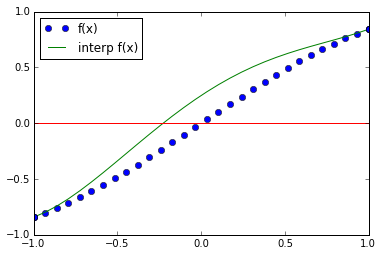

In [3]:
button=widgets.Button(description="click me")
buttonDiffSock=widgets.Button(description="click me")

strPoints = widgets.Text(description='points',value='-1,-1,1,1')
strFunct=widgets.Text(description=r'f(x)=',value='sin(pi*x)')

strPointsDiffSock = widgets.Text(description='points',value='')
strFunctDiffSock=widgets.Text(description=r'f(x)=',value='sin(x)')
strPointDiffSock=widgets.Text(description='x0=',value='0')

def on_button_cliked(event):
    l=lg.Lagrange()
    clear_output()
    #display(Math(r'$\begin{pmatrix}1 & 2 \\ 3 & 4\end{pmatrix}$'))
    
    plt.cla()
    points=[float(s) for s in list(strPoints.value.split(','))]
    f=strFunct.value
    l.lagrangeInterp(points=points,func=f)
    
    l.showInNotebook()
    display(l.dataFrameD)
    l.plot()
    display(Math("interp\ f(x)="+lg.latex(l.iF)))
    
def on_button_clikedDiffSock(event):
    l=lg.Lagrange()
    clear_output()
    
    if len(strPointsDiffSock.value)==0:
        points=[]
    else:
        points=[float(s) for s in list(strPointsDiffSock.value.split(','))]
    f=strFunctDiffSock.value
    
    if len(strPointDiffSock.value)==0:
        x0=0
    else:
        x0=float(strPointDiffSock.value)
    
    l.diffSocket()
    l.showInNotebook()
    display(l.dataFrameDD)

    #display(Math("interp\ f(x)="+lg.latex(l.iF)))
    
button.on_click(on_button_cliked)
buttonDiffSock.on_click(on_button_clikedDiffSock)

page1 = widgets.Box(children=[button, strPoints,strFunct])
page2 = widgets.Box(children=[buttonDiffSock,strPointsDiffSock,
                              strFunctDiffSock,strPointDiffSock])
#display(container)
tabs = widgets.Tab(children=[page1, page2])
display(tabs)

tabs.set_title(0, 'Lagrange interpolation')
tabs.set_title(1, 'Socket multiplication algoriphm')






## Least Squares algorithm with Head function or Jacobi for basis

In [4]:
buttonH=widgets.Button(description="click me")
buttonJ=widgets.Button(description="click me")
buttonEps=widgets.Button(description="click me")

strPointsH = widgets.Text(description='points',value='')
strPointsJ = widgets.Text(description='points',value='-1,1')
strFunctH=widgets.Text(description=r'f(x)=',value='sin(x)')
strFunctJ=widgets.Text(description=r'f(x)=',value='Piecewise((x+1,x>0),(-x+1,x<0),(1,True))')
strEps= widgets.Text(description='Eps',value='1')
strFunctEps=widgets.Text(description=r'f(x)=',value='Piecewise((x+1,x>0),(-x+1,x<0),(1,True))')

def on_button_clikedH(event,x):
    l1=ls.LeastSquares()
    clear_output()
    #display(Math(r'$\begin{pmatrix}1 & 2 \\ 3 & 4\end{pmatrix}$'))
    
    plt.cla()
    if x==0:
        if len(strPointsH.value)!=0:
            l1.points=[float(s) for s in list(strPointsH.value.split(','))]
        l1.f=strFunctH.value
        l1.createBasisH()
    elif x==1:
        #if len(strPointsJ.value)!=0:
        l1.points=[-1,1]
        l1.f=strFunctJ.value
        l1.createBasisJ()
    else:
        pass
    
    l1.leastSquares()
    #print(l1.points)
    #print(l1.f)
    #print(l1.iF)
    l1.showInNotebook()
    
    if x!=0:
        display(Math("interp\ f(x)="+l1.texF))
    #display(l.dataFrameD)
    #l.plot()    
    #display(Math("interp\ f(x)="+l1.texF))
    display("Basis:")
    for b in l1.texBasis:
        display(Math(b))

def on_button_clikedEps(event):
    l1=ls.LeastSquares()
    clear_output()
    plt.cla()
    eps=float(strEps.value)
    for n in range(12):
        l1=ls.LeastSquares()
        l1.f=strFunctJ.value
        l1.forEps(n=n)
        if l1.eps()<=eps:
            break
        if(n>10):
            print("fail")
            break
    
    l1.showInNotebook()
    
    display(Math("interp\ f(x)="+l1.texF))
    display("Basis:")
    for b in l1.texBasis:
        display(Math(b))

p=lambda event,x:on_button_clikedH(event,x)
pH=lambda event:p(event,0)
pJ=lambda event:p(event,1)

buttonH.on_click(pH)#on_button_clikedH
buttonJ.on_click(pJ)#on_button_clikedJ
buttonEps.on_click(on_button_clikedEps)

page1 = widgets.Box(children=[buttonH, strPointsH,strFunctH])
page2 = widgets.Box(children=[buttonJ,strPointsJ,strFunctJ])
page3 = widgets.Box(children=[buttonEps,strEps,strFunctEps])
#display(container)
tabs = widgets.Tab(children=[page3, page1,page2])
display(tabs)

tabs.set_title(0, 'Jacoby basis eps')

tabs.set_title(1, 'Head function basis')
tabs.set_title(2, 'Jacoby basis')


## spline algorithm with use parabolas polinom (i.e. polinom degree of 2)

In [5]:
button=widgets.Button(description="click me")
buttonJ=widgets.Button(description="click me")

strPointsX = widgets.Text(description='points X',value='0,1,2,3,4')
strPointsY = widgets.Text(description='points Y',value='0,0,1,0,0')
strFunct=widgets.Text(description=r'f(x)=',value='sin(x)')


def on_button_cliked(event):
    l2=sp.SplineParab()
    clear_output()
    #display(Math(r'$\begin{pmatrix}1 & 2 \\ 3 & 4\end{pmatrix}$'))
    
    plt.cla()
  
    if len(strPointsX.value)!=0:
        pointsX=[float(s) for s in list(strPointsX.value.split(','))]
    if len(strPointsY.value)!=0:
        pointsY=[float(s) for s in list(strPointsY.value.split(','))]
    f=strFunct.value
    
    l2.splineParab(points=pointsX,y=pointsY,f=f)
    l2.showInNotebook()
    
    for i in range(l2.n):
        display(Math(r'$ p_{%s}(x),g(x),h(x), p_{%s}(x):$'%(i,i+1)))
        display(l2.dataFrames[i])
        l2.plot(i)
        
    #display(Math("interp\ f(x)="+l1.texF))
    #display(l.dataFrameD)
    #l.plot()    
    #display(Math("interp\ f(x)="+l1.texF))
        
button.on_click(on_button_cliked)


page1 = widgets.Box(children=[button, strPointsX,strPointsY,strFunct])
display(page1)
